In [126]:
import pandas as pd
import requests
import os

import hvplot.pandas
import geoviews as gv
import holoviews as hv
import matplotlib.pyplot as plt
import numpy as np

# import geopandas as gpd
# import cartopy
# from cartopy import crs as ccrs

# gv.extension('matplotlib', 'bokeh')

from api_keys import geoapify_key

## Getting EV charging station data from Geoapify API
---

In [2]:
# read df for Austrlia cities and their lat and lng 
path = os.path.join(".","Dataset","Australia_city.csv")
au_cities = pd.read_csv(path)
au_cities

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Sydney,-33.8650,151.2094,Australia,AU,New South Wales,admin,5312163,4840600
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
2,Brisbane,-27.4678,153.0281,Australia,AU,Queensland,admin,2514184,2360241
3,Perth,-31.9522,115.8589,Australia,AU,Western Australia,admin,2059484,2039200
4,Adelaide,-34.9289,138.6011,Australia,AU,South Australia,admin,1345777,1295714
...,...,...,...,...,...,...,...,...,...
538,Bunyip,-38.0833,145.7170,Australia,AU,Victoria,NaN,2468,2468
539,Dodges Ferry,-42.8539,147.6194,Australia,AU,Tasmania,NaN,2467,2467
540,Lancefield,-37.2667,144.7167,Australia,AU,Victoria,NaN,2455,2455
541,Palm Island,-18.7345,146.5794,Australia,AU,Queensland,NaN,2455,2455


In [3]:
# Plotting each cities in the table to get an idea of the coverage 
city_map = au_cities.hvplot.points("lng", "lat", 
    geo= True, #display of map
    tiles= "CartoLight", # map background
    frame_height= 500,
)

city_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]

In [ ]:
# empty list for storing charging station data
station_data = {}

# set radius
radius = "100000"

# Set base URL
base_url = "https://api.geoapify.com/v2/places?"

# set params
params = {
    "apiKey" : geoapify_key,
    "categories" : "service.vehicle.charging_station",
    "limit" : "60"
}

# Print a message for charging station search
print("Starting searching.....")

for index, row in au_cities.iterrows():
    # get latitude, longitude from the DataFrame
    lng = row["lng"] # getting column "Lng" from each row
    lat = row["lat"]
    city = row["city"]
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f'circle:{lng},{lat},{radius}'
    
    # Make and API request using the params dictionaty
    # and then Convert the API response to JSON format
    response = requests.get(base_url, params = params).json()
    
    try:
        station_data[city] = response['features']
        print(city)
    
    except (KeyError, IndexError):
        print("No Charging station founded.")

In [ ]:
# the data output
station_data

In [ ]:
# putting the full data set into dataframe
other_data = []
output_data = []

for index, row in au_cities.iterrows():
    city = row["city"]
    length_list = len(station_data[city])
    for n in range(length_list):
        try:
            try:
                station_name = station_data[city][n]["properties"]["name"]
            except:
                station_name = " "
            try:
                city_name = station_data[city][n]["properties"]["city"]
            except:
                city_name = " "
            try:
                state = station_data[city][n]["properties"]["state"]
            except:
                state = " "
            try:
                address_line1 = station_data[city][n]["properties"]["address_line1"]
            except:
                address_line1 = " "
            try:
                address_line2 = station_data[city][n]["properties"]["address_line2"]
            except:
                address_line2 = " "
            try:
                lng = station_data[city][n]["properties"]["lon"]
            except:
                lng = " "
            try:
                lat = station_data[city][n]["properties"]["lat"]
            except:
                lat = " "
            try:
                category = station_data[city][n]["properties"]["categories"]
            except:
                category = " "
        
        except:
            # putting other data into a new dictionary for futher cleaning
            # make sure that the other_data list is empty before saving the dataframe
            other_data.append(station_data[city][n])
        
        # putting a all the into the output_data list
        output_data.append({"Charing station name": station_name,
                            "City": city_name,
                            "State": state,
                            "Address line 1": address_line1,
                            "Address line 2": address_line2,
                            "Lng": lng,
                            "Lat": lat,
                            "Category": category})

# save data into dataframe
station_data_df = pd.DataFrame(output_data)

# output and save data
station_data_df.to_csv("output_data/charging_station.csv", index_label="station_ID")

In [4]:
# read and import data frame
station_data_df = pd.read_csv("./output_data/charging_station.csv")
station_data_df

,station_ID,Charing station name,City,State,Address line 1,Address line 2,Lng,Lat,Category
0,0,Bell Resources,Sydney,New South Wales,Bell Resources,"88 Phillip Street, Sydney NSW 2000, Australia",151.211908,-33.864820,"['office', 'office.company', 'service', 'servi..."
1,1,NRMA Fast Charger,Picton,New South Wales,NRMA Fast Charger,"Walton Street, Picton NSW 2571, Australia",150.610947,-34.168303,"['no_fee', 'no_fee.no', 'service', 'service.ve..."
2,2,Evie Seven Hills,Sydney,New South Wales,Evie Seven Hills,"Abbott Road, Seven Hills NSW 2147, Australia",150.954824,-33.767144,"['access', 'access.yes', 'fee', 'service', 'se..."
3,3,Evie Networks,Sydney,New South Wales,Evie Networks,"The Crescent, Mosman NSW 2088, Australia",151.241440,-33.825474,"['service', 'service.vehicle', 'service.vehicl..."
4,4,Rhodes Waterside,Sydney,New South Wales,Rhodes Waterside,"1 Rider Boulevard, Rhodes NSW 2138, Australia",151.084835,-33.835963,"['no_fee', 'no_fee.no', 'service', 'service.ve..."
...,...,...,...,...,...,...,...,...,...
9570,9570,,Melbourne,Victoria,Scanlon Drive,"Epping VIC 3076, Australia",144.994228,-37.647885,"['service', 'service.vehicle', 'service.vehicl..."
9571,9571,Evie Networks,Townsville,Queensland,Evie Networks,"38011 Bruce Highway, Cluden QLD 4811, Australia",146.828466,-19.319499,"['service', 'service.vehicle', 'service.vehicl..."
9572,9572,QESH - Townsville,Townsville,Queensland,QESH - Townsville,"1 James Cook Drive, Douglas QLD 4811, Australia",146.758460,-19.323333,"['service', 'service.vehicle', 'service.vehicl..."
9573,9573,QESH - Cardwell,Cardwell,Queensland,QESH - Cardwell,"Victoria Street, Cardwell QLD 4849, Australia",146.024619,-18.262765,"['service', 'service.vehicle', 'service.vehicl..."


In [5]:
list_category = pd.Series(station_data_df["Category"])
Fee = ["no information"]*len(list_category)

# extract the information in the category list: fee and non fee payable
for n, list_item in enumerate(list_category):
    if "no_fee" in list_item:
        Fee[n] = "No fee required"
    elif "fee" in list_item:
        Fee[n] = "fee required"

station_data_df["Fee required"] = Fee
station_data_df_rm_category = station_data_df.drop(columns= ["Category", "station_ID"], axis= 1)
station_data_df_rm_category

,Charing station name,City,State,Address line 1,Address line 2,Lng,Lat,Fee required
0,Bell Resources,Sydney,New South Wales,Bell Resources,"88 Phillip Street, Sydney NSW 2000, Australia",151.211908,-33.864820,no information
1,NRMA Fast Charger,Picton,New South Wales,NRMA Fast Charger,"Walton Street, Picton NSW 2571, Australia",150.610947,-34.168303,No fee required
2,Evie Seven Hills,Sydney,New South Wales,Evie Seven Hills,"Abbott Road, Seven Hills NSW 2147, Australia",150.954824,-33.767144,fee required
3,Evie Networks,Sydney,New South Wales,Evie Networks,"The Crescent, Mosman NSW 2088, Australia",151.241440,-33.825474,no information
4,Rhodes Waterside,Sydney,New South Wales,Rhodes Waterside,"1 Rider Boulevard, Rhodes NSW 2138, Australia",151.084835,-33.835963,No fee required
...,...,...,...,...,...,...,...,...
9570,,Melbourne,Victoria,Scanlon Drive,"Epping VIC 3076, Australia",144.994228,-37.647885,no information
9571,Evie Networks,Townsville,Queensland,Evie Networks,"38011 Bruce Highway, Cluden QLD 4811, Australia",146.828466,-19.319499,no information
9572,QESH - Townsville,Townsville,Queensland,QESH - Townsville,"1 James Cook Drive, Douglas QLD 4811, Australia",146.758460,-19.323333,no information
9573,QESH - Cardwell,Cardwell,Queensland,QESH - Cardwell,"Victoria Street, Cardwell QLD 4849, Australia",146.024619,-18.262765,no information


In [6]:
# identify how many duplicates in the table
station_data_df_rm_category[station_data_df_rm_category.duplicated()]

,Charing station name,City,State,Address line 1,Address line 2,Lng,Lat,Fee required
179,Evie Networks,,Queensland,Evie Networks,"The Circuit, QLD 4011, Australia",153.077346,-27.415767,no information
180,Tesla Supercharger,,Queensland,Tesla Supercharger,"Ann Street, Fortitude Valley QLD 4006, Australia",153.040441,-27.451571,no information
181,Tesla Supercharger,Gold Coast City,Queensland,Tesla Supercharger,"Hooker Boulevard, Gold Coast City QLD 4218, Au...",153.427325,-28.035278,no information
184,QESH - North Lakes,,Queensland,QESH - North Lakes,"David Henry Way, Springfield Central QLD 4300,...",152.899745,-27.682182,no information
185,QESH - Hamilton,,Queensland,QESH - Hamilton,"Macarthur Avenue, QLD 4009, Australia",153.083937,-27.444333,fee required
...,...,...,...,...,...,...,...,...
9570,,Melbourne,Victoria,Scanlon Drive,"Epping VIC 3076, Australia",144.994228,-37.647885,no information
9571,Evie Networks,Townsville,Queensland,Evie Networks,"38011 Bruce Highway, Cluden QLD 4811, Australia",146.828466,-19.319499,no information
9572,QESH - Townsville,Townsville,Queensland,QESH - Townsville,"1 James Cook Drive, Douglas QLD 4811, Australia",146.758460,-19.323333,no information
9573,QESH - Cardwell,Cardwell,Queensland,QESH - Cardwell,"Victoria Street, Cardwell QLD 4849, Australia",146.024619,-18.262765,no information


In [7]:
# drop all the duplicates
station_data_df_rm_dup = station_data_df_rm_category.drop_duplicates()
station_data_df_rm_dup

,Charing station name,City,State,Address line 1,Address line 2,Lng,Lat,Fee required
0,Bell Resources,Sydney,New South Wales,Bell Resources,"88 Phillip Street, Sydney NSW 2000, Australia",151.211908,-33.864820,no information
1,NRMA Fast Charger,Picton,New South Wales,NRMA Fast Charger,"Walton Street, Picton NSW 2571, Australia",150.610947,-34.168303,No fee required
2,Evie Seven Hills,Sydney,New South Wales,Evie Seven Hills,"Abbott Road, Seven Hills NSW 2147, Australia",150.954824,-33.767144,fee required
3,Evie Networks,Sydney,New South Wales,Evie Networks,"The Crescent, Mosman NSW 2088, Australia",151.241440,-33.825474,no information
4,Rhodes Waterside,Sydney,New South Wales,Rhodes Waterside,"1 Rider Boulevard, Rhodes NSW 2138, Australia",151.084835,-33.835963,No fee required
...,...,...,...,...,...,...,...,...
7703,CTR Ouyen,Ouyen,Victoria,CTR Ouyen,"Walsh Lane, Ouyen VIC 3490, Australia",142.315616,-35.071009,no information
8085,Tesla Supercharger,Keith,South Australia,Tesla Supercharger,"Heritage Street, Keith SA 5267, Australia",140.355756,-36.099066,no information
8086,Chargefox,Keith,South Australia,Chargefox,"Pine Street, Keith SA 5267, Australia",140.361563,-36.105079,no information
8441,,Merredin,Western Australia,Barrack Street,"Merredin WA 6415, Australia",118.278581,-31.482547,no information


In [8]:
# Configure the map plot
station_map = station_data_df_rm_dup.hvplot.points("Lng", "Lat", 
    geo= True, #display of map
    tiles= "CartoLight", # map background
    color= "Fee required",
    hover_cols= "all", # showing all the infor in the hover
    frame_height= 500,
    frame_width= 700,
    cmap= "Set2" # using colourmap
)

station_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Fee required,index,Charing station name,City,State,Address line 1,Address line 2)

## Compared the API data with official data from electric vehicles council
----

In [28]:
# read the dataset (public charging infrastructure)
path = os.path.join(".","Dataset","Public_charging_infrastructure.csv")
public_charging_df = pd.read_csv(path)
public_charging_df["sum of charge sites"] = public_charging_df["No. of DC fast sites"] + public_charging_df["No. of stardard charge sites"]

public_charging_df_rm = public_charging_df.drop(8) # remove the "National" row
public_charging_df_rm

,States,No. of DC fast sites,No. of stardard charge sites,No. of DC fast chargers,No. of stardard chargers,sum of charge sites
0,ACT,5,28,10,48,33
1,NSW,78,426,181,836,504
2,NT,2,14,2,28,16
3,QLD,57,234,84,402,291
4,SA,14,144,27,256,158
5,TAS,16,63,18,82,79
6,VIC,46,316,115,607,362
7,WA,26,184,33,272,210


In [24]:
path = os.path.join(".","Dataset","State_location.csv")
state_df = pd.read_csv(path)
state_df

,States,Latitude,Longitude
0,ACT,-35.2924,149.0005
1,NSW,-32.0948,147.0100
2,NT,-19.2300,133.2128
3,QLD,-22.2913,144.2554
4,SA,-30.0330,135.4548
5,TAS,-42.0117,146.3536
6,VIC,-36.5115,144.1652
7,WA,-25.1941,122.1754


In [19]:
# Plotting each cities in the table to get an idea of the coverage 
state_map = state_df.hvplot.points("Longitude", "Latitude", 
    geo= True, #display of map
    tiles= "CartoLight", # map background
    frame_height= 500,
)

state_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

In [63]:
# merge the two table
station_merged_df = pd.merge(state_df, public_charging_df_rm, how="right", on=["States", "States"])
station_merged_df

,States,Latitude,Longitude,No. of DC fast sites,No. of stardard charge sites,No. of DC fast chargers,No. of stardard chargers,sum of charge sites
0,ACT,-35.2924,149.0005,5,28,10,48,33
1,NSW,-32.0948,147.0100,78,426,181,836,504
2,NT,-19.2300,133.2128,2,14,2,28,16
3,QLD,-22.2913,144.2554,57,234,84,402,291
4,SA,-30.0330,135.4548,14,144,27,256,158
5,TAS,-42.0117,146.3536,16,63,18,82,79
6,VIC,-36.5115,144.1652,46,316,115,607,362
7,WA,-25.1941,122.1754,26,184,33,272,210


In [56]:
station_merged_modified_df = station_merged_df
station_merged_modified_df["sum of charge sites"] = station_merged_modified_df["sum of charge sites"]*2
# Configure the map plot
state_station_map = station_merged_modified_df.hvplot.points("Longitude", "Latitude", 
    geo= True, #display of map
    tiles= "CartoLight", # map background
    color= "States",
    size= "sum of charge sites",
    hover_cols= "all", # showing all the infor in the hover
    frame_height= 500,
    frame_width= 700,
    cmap= "Set2" # using colourmap
)
state_station_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (States,sum of charge sites,index,No. of DC fast sites,No. of stardard charge sites,No. of DC fast chargers, No. of stardard chargers)

In [121]:
# grouping each state together (API data) using groupby
station_data_df_rm_dup = station_data_df_rm_dup.replace(["New South Wales", "Victoria", "Queensland", "Western Australia", "South Australia", "Tasmania", " "],
                                                        ["NSW", "VIC", "QLD", "WA", "SA", "TAS", "ACT + NT"])
state_station_grp = station_data_df_rm_dup.groupby("State", as_index=False) # as_index is avoiding the state column set as index after groupby
state_station_grp = pd.concat([state_station_grp["Charing station name"].count()], axis = "columns", sort=False)
state_station_grp.columns = ["States", "number of charging station (from API)"]
state_station_grp

,States,number of charging station (from API)
0,ACT + NT,16
1,NSW,179
2,QLD,57
3,SA,34
4,TAS,36
5,VIC,146
6,WA,25


In [113]:
# adding the row of NT and ACT together (in official data) because API data missing NT and ACT states data, cannot define which stations are from NT/ACT
state_station_offical = station_merged_df[["States", "Latitude", "Longitude", "sum of charge sites"]]
ACT_plus_NT = state_station_offical.loc[0, "sum of charge sites"] + state_station_offical.loc[2, "sum of charge sites"]
state_station_offical.loc[8] = ["ACT + NT", "", "", ACT_plus_NT]
state_station_offical = state_station_offical.drop([0, 2])
state_station_offical

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,States,Latitude,Longitude,sum of charge sites
1,NSW,-32.0948,147.01,504
3,QLD,-22.2913,144.255,291
4,SA,-30.033,135.455,158
5,TAS,-42.0117,146.354,79
6,VIC,-36.5115,144.165,362
7,WA,-25.1941,122.175,210
8,ACT + NT,,,49


In [125]:
state_station_compare = pd.merge(state_station_offical, state_station_grp, how="outer", on=["States", "States"])
state_station_compare.columns = ["States", "Latitude","Longitude", "number of charge sites (electric vehicles council)", "number of charging station (Geoapify)"]
state_station_compare

,States,Latitude,Longitude,number of charge sites (electric vehicles council),number of charging station (Geoapify)
0,NSW,-32.0948,147.01,504,179
1,QLD,-22.2913,144.255,291,57
2,SA,-30.033,135.455,158,34
3,TAS,-42.0117,146.354,79,36
4,VIC,-36.5115,144.165,362,146
5,WA,-25.1941,122.175,210,25
6,ACT + NT,,,49,16


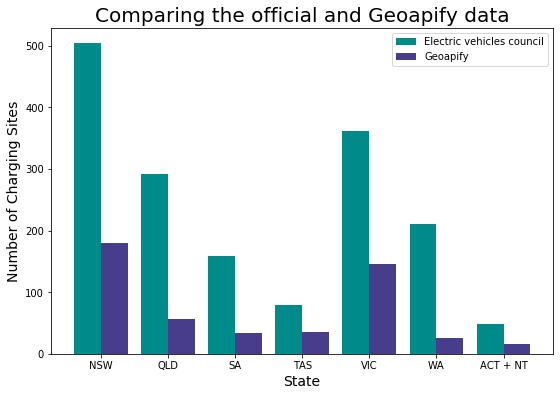

In [178]:

label = list(state_station_compare["States"])

x = np.arange(len(label))  # the label locations
width = 0.4  # the width of the bars

plt.figure(figsize=(9, 6))
rects1 = plt.bar(x - width/2, state_station_compare["number of charge sites (electric vehicles council)"], 
                 width, 
                 label='Electric vehicles council', 
                 color= "darkcyan")
rects2 = plt.bar(x + width/2, state_station_compare["number of charging station (Geoapify)"], width, label='Geoapify', color= "darkslateblue")

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Number of Charging Sites', fontsize=14)
plt.xlabel("State", fontsize= 14)
plt.title('Comparing the official and Geoapify data', fontsize=20)
plt.xticks(x, labels= label)
plt.legend()


plt.show()